In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# For ignoring the warnings
import warnings
warnings. filterwarnings("ignore")

In [17]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Loading the dataset
car_df = pd.read_csv("car data.csv")

# Viewing first 5 rows of the dataset
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
# Dropping the column "Car_Name" from the dataset
car_df.drop(["Car_Name"], axis=1, inplace=True)

# Checking dataset after dropping the feature
car_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
# Deriving a feature "Years_Used" from existing features

#----Creating a feature Present_Year---To be used for deriving the new feature
car_df["Present_Year"] = 2020
car_df.head()#-----Dataset after adding the feature Present_Year

car_df["Years_Used"] = car_df["Present_Year"] - car_df["Year"]

#----Dropping the features "Year" and "Present_Year"----No more required
car_df.drop(["Year", "Present_Year"], axis = 1, inplace=True)
car_df.head()#-----New dataset to be used

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [22]:
# Checking for null values in the dataset
car_df.isnull().sum()
# No null values present-----Replacement not required

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Years_Used       0
dtype: int64

In [28]:
# Categorical Feature Encoding

#----Checking the data-types of each columns
car_df.dtypes

#----Checking no of unique values in each categorical features
car_df["Fuel_Type"].unique()
car_df["Seller_Type"].unique()
car_df["Transmission"].unique()

#---All categorical features are nominal----Less no of unique values----Apply ONE-HOT ENCODING
car_df = pd.get_dummies(car_df, drop_first=True)#----drop_first helps in avoiding dummy variable trap
car_df.head()#----Final dataset to be used

Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Years_Used         int64
dtype: object

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

array(['Dealer', 'Individual'], dtype=object)

array(['Manual', 'Automatic'], dtype=object)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [41]:
# Storing the original dataset without outlier treatment----All Algorithms are not sensitive towards outliers
car_df_outlier = car_df.copy()

<AxesSubplot:xlabel='Selling_Price'>

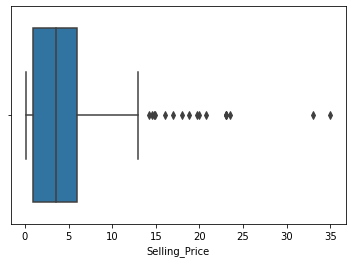

In [42]:
# Checking for outliers in "Selling_Price" Column
sns.boxplot(car_df_outlier["Selling_Price"])

(array([0.27976919, 0.0667631 , 0.09855506, 0.08583827, 0.12398862,
        0.07947988, 0.04450873, 0.04768793, 0.03497115, 0.01271678,
        0.01907517, 0.00635839, 0.0031792 , 0.00635839, 0.00635839,
        0.0031792 , 0.0031792 , 0.00635839, 0.0031792 , 0.02543356]),
 array([ 0.1  ,  1.145,  2.19 ,  3.235,  4.28 ,  5.325,  6.37 ,  7.415,
         8.46 ,  9.505, 10.55 , 11.595, 12.64 , 13.685, 14.73 , 15.775,
        16.82 , 17.865, 18.91 , 19.955, 21.   ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Selling-Price')

Text(0, 0.5, 'Count')

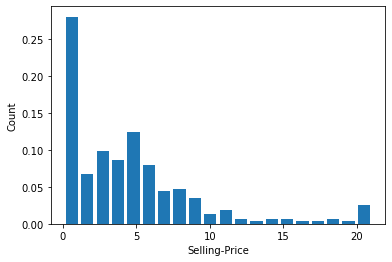

In [48]:
# OUTLIER TREATMENT

#----Plotting histogram to check distribution
plt.hist(car_df_outlier.Selling_Price, bins = 20, rwidth=0.8, density=True)
plt.xlabel("Selling-Price")
plt.ylabel("Count")
#----Data not normally distributed----IQR Technique to be used for outlier treatment

In [ ]:
#---Finding the value of Inter-Quatile Range (IQR)
IQR_sell_price = car_df_outlier.Selling_Price.quantile(0.75) - car_df_outlier.Selling_Price.quantile(0.25)

#----Finding lower bridge and upper bridge
lower_bridge_sell_price = car_df_outlier["Selling_Price"].quantile(0.25) - (IQR_sell_price * 1.5)
upper_bridge_sell_price = car_df_outlier["Selling_Price"].quantile(0.75) + (IQR_sell_price * 1.5)

#----Finding the extreme lower and upper bridge
extreme_lower_bridge_sell_price = car_df_outlier["Selling_Price"].quantile(0.25) - (IQR_sell_price * 3)
extreme_upper_bridge_sell_price = car_df_outlier["Selling_Price"].quantile(0.75) + (IQR_sell_price * 3)

print(extreme_lower_bridge_sell_price)
print(extreme_upper_bridge_sell_price)

#----Replacing the outlier value with extreme upper bridge value
car_df_outlier.loc[car_df_outlier["Selling_Price"] >= 21, "Selling_Price"] = 21

<AxesSubplot:xlabel='Present_Price'>

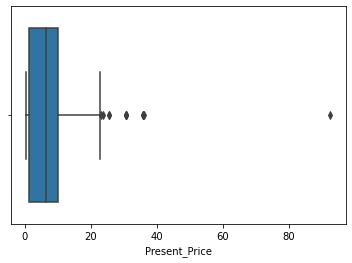

In [30]:
# Checking for outliers in "Present_Price" Column
sns.boxplot(car_df["Present_Price"])

(array([0.09000485, 0.0705638 , 0.03240175, 0.0093605 , 0.00504027,
        0.00216012, 0.00360019, 0.00288016, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00072004]),
 array([ 0.32 ,  4.934,  9.548, 14.162, 18.776, 23.39 , 28.004, 32.618,
        37.232, 41.846, 46.46 , 51.074, 55.688, 60.302, 64.916, 69.53 ,
        74.144, 78.758, 83.372, 87.986, 92.6  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Present_Price')

Text(0, 0.5, 'Count')

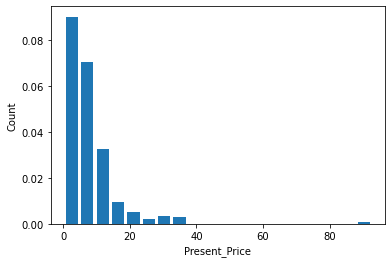

In [49]:
# OUTLIER TREATMENT

#----Plotting histogram to check distribution
plt.hist(car_df_outlier.Present_Price, bins = 20, rwidth=0.8, density=True)
plt.xlabel("Present_Price")
plt.ylabel("Count")
#----Data not normally distributed----IQR Technique to be used for outlier treatment

In [51]:
#---Finding the value of Inter-Quatile Range (IQR)
IQR_present_price = car_df_outlier.Present_Price.quantile(0.75) - car_df_outlier.Present_Price.quantile(0.25)

#----Finding lower bridge and upper bridge
lower_bridge_present_price = car_df_outlier["Present_Price"].quantile(0.25) - (IQR_present_price * 1.5)
upper_bridge_present_price = car_df_outlier["Present_Price"].quantile(0.75) + (IQR_present_price * 1.5)

#----Finding the extreme lower and upper bridge
extreme_lower_bridge_present_price = car_df_outlier["Present_Price"].quantile(0.25) - (IQR_present_price * 3)
extreme_upper_bridge_present_price = car_df_outlier["Present_Price"].quantile(0.75) + (IQR_present_price * 3)

print(extreme_lower_bridge_present_price)
print(extreme_upper_bridge_present_price)

#----Replacing the outlier value with extreme upper bridge value
car_df_outlier.loc[car_df_outlier["Present_Price"] >= 36, "Present_Price"] = 36

-24.900000000000002
36.0


<AxesSubplot:xlabel='Kms_Driven'>

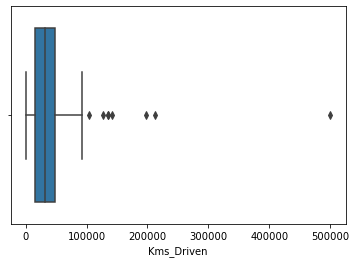

In [31]:
# Checking for outliers in "Kms_Driven" Column
sns.boxplot(car_df["Kms_Driven"])

(array([1.70269938e-05, 1.43665260e-05, 5.98605250e-06, 1.59628067e-06,
        1.33023389e-07, 5.32093555e-07, 0.00000000e+00, 1.33023389e-07,
        1.33023389e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.33023389e-07]),
 array([   500.,  25475.,  50450.,  75425., 100400., 125375., 150350.,
        175325., 200300., 225275., 250250., 275225., 300200., 325175.,
        350150., 375125., 400100., 425075., 450050., 475025., 500000.]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Kms_Driven')

Text(0, 0.5, 'Count')

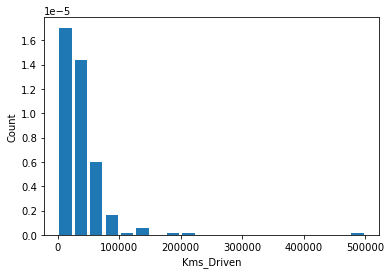

In [52]:
# OUTLIER TREATMENT

#----Plotting histogram to check distribution
plt.hist(car_df_outlier.Kms_Driven, bins = 20, rwidth=0.8, density=True)
plt.xlabel("Kms_Driven")
plt.ylabel("Count")
#----Data not normally distributed----IQR Technique to be used for outlier treatment

In [54]:
#---Finding the value of Inter-Quatile Range (IQR)
IQR_kms = car_df_outlier.Kms_Driven.quantile(0.75) - car_df_outlier.Kms_Driven.quantile(0.25)

#----Finding lower bridge and upper bridge
lower_bridge_kms = car_df_outlier["Kms_Driven"].quantile(0.25) - (IQR_kms * 1.5)
upper_bridge_kms = car_df_outlier["Kms_Driven"].quantile(0.75) + (IQR_kms * 1.5)

#----Finding the extreme lower and upper bridge
extreme_lower_bridge_kms= car_df_outlier["Kms_Driven"].quantile(0.25) - (IQR_kms * 3)
extreme_upper_bridge_kms = car_df_outlier["Kms_Driven"].quantile(0.75) + (IQR_kms * 3)

print(extreme_lower_bridge_kms)
print(extreme_upper_bridge_kms)

#----Replacing the outlier value with extreme upper bridge value
car_df_outlier.loc[car_df_outlier["Present_Price"] >= 150068, "Present_Price"] = 150068

-86301.0
150068.0


<AxesSubplot:xlabel='Years_Used'>

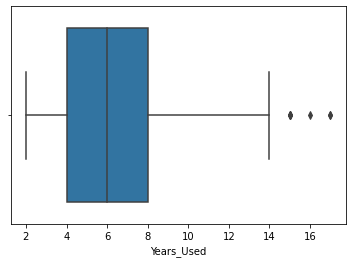

In [56]:
# Checking for outliers in "Years_Used" Column
sns.boxplot(car_df["Years_Used"])

<AxesSubplot:xlabel='Years_Used', ylabel='Density'>

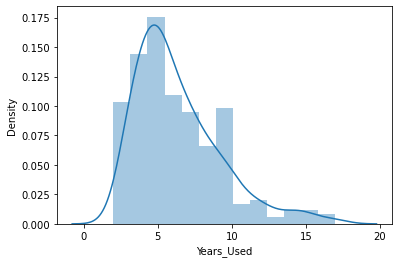

In [58]:
# Checking the data distribution in derived feature-Years_used
sns.distplot(car_df_outlier["Years_Used"])

(array([0.00442968, 0.15503876, 0.22148394, 0.        , 0.27021041,
        0.1683278 , 0.1461794 , 0.        , 0.10188261, 0.0841639 ,
        0.06644518, 0.        , 0.02657807, 0.03100775, 0.00885936,
        0.        , 0.01771872, 0.01771872, 0.00442968, 0.00885936]),
 array([ 2.  ,  2.75,  3.5 ,  4.25,  5.  ,  5.75,  6.5 ,  7.25,  8.  ,
         8.75,  9.5 , 10.25, 11.  , 11.75, 12.5 , 13.25, 14.  , 14.75,
        15.5 , 16.25, 17.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Years_Used')

Text(0, 0.5, 'Count')

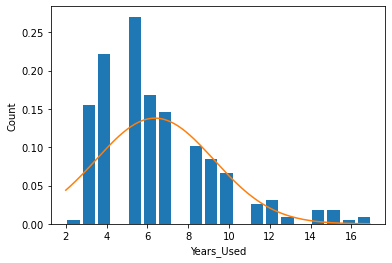

In [59]:
# OUTLIER TREATMENT

#----Plotting histogram to check distribution
plt.hist(car_df_outlier.Years_Used, bins = 20, rwidth=0.8, density=True)
plt.xlabel("Years_Used")
plt.ylabel("Count")

from scipy.stats import norm
#----Plotting the bell shaped curved
rng = np.arange(car_df_outlier.Years_Used.min(), car_df_outlier.Years_Used.max(), 0.1)
plt.plot(rng, norm.pdf(rng, car_df_outlier.Years_Used.mean(), car_df_outlier.Years_Used.std()))

#----Data normally distributed----3 STD Deviation to be used for outlier treatment

In [61]:
# Finding the lower and upper limit using 3 Standard Deviation
lower_limit_years = car_df_outlier.Years_Used.mean() - 3 * car_df_outlier.Years_Used.std()
upper_limit_years = car_df_outlier.Years_Used.mean() + 3 * car_df_outlier.Years_Used.std()

print(lower_limit_years)
print(upper_limit_years)

# Replacing the outlier value with upper limit
car_df_outlier.loc[car_df_outlier["Years_Used"] >= 15, "Years_Used"] = 15

-2.3025693587542486
15.046755405265877


In [64]:
# Viewing the final statistical measures before removing the outliers
car_df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,6.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,8.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# Viewing the final statistical measures after removing the outliers
car_df_outlier.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.546678,7.439668,36947.205980,0.043189,6.355482,0.199336,0.794020,0.352159,0.867110
std,4.568339,7.297755,38886.883882,0.247915,2.836056,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,8.000000,0.000000,1.000000,1.000000,1.000000
max,21.000000,36.000000,500000.000000,3.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Preprocessed Dataset without outlier treatment
car_df.to_csv("Car_Preprocess.csv", index=False)

In [63]:
# Preprocessed Dataset with outlier treatment
car_df_outlier.to_csv("Car_Preprocess_Outlier.csv",  index=False)